In [1]:
# load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load data
results = pd.ExcelWriter("trade_data.xlsx")
results_trader = pd.ExcelWriter("trade_data.xlsx")
for i in range(1,5):
    rd0 = pd.read_csv('island-data-bottle-round-5/trades_round_'+str(i)+'_day_'+str(-3+i)+'_wn.csv', sep = ';')
    rd1 = pd.read_csv('island-data-bottle-round-5/trades_round_'+str(i)+'_day_'+str(-2+i)+'_wn.csv', sep = ';')
    rd2 = pd.read_csv('island-data-bottle-round-5/trades_round_'+str(i)+'_day_'+str(-1+i)+'_wn.csv', sep = ';')
    def update_timestamp(df,day):
        df['timestamp'] = (day)*100*10000+df['timestamp']
        #df.drop(['day'], axis = 1, inplace = True)
        return df

    rd0_shift = update_timestamp(rd0,0)
    rd1_shift = update_timestamp(rd1,1)
    rd2_shift = update_timestamp(rd2,2)

    # merge the three dataframes into one
    round = pd.concat([rd0_shift, rd1_shift, rd2_shift], axis = 0)
    round.to_excel(results, 'round %d'%i,index=False)
results.save()
results.close()

In [5]:
d1 = pd.read_excel('trade_data.xlsx',sheet_name='round %d'%1)
d2 = pd.read_excel('trade_data.xlsx',sheet_name='round %d'%2)
d3 = pd.read_excel('trade_data.xlsx',sheet_name='round %d'%3)
d4 = pd.read_excel('trade_data.xlsx',sheet_name='round %d'%4)
'''
def update_timestamp(df,day):
    day = {1:2999600,2:2999800,3:2999500}
    df['timestamp'] = day[i]+df['timestamp']
    #df.drop(['day'], axis = 1, inplace = True)
    return df
data = pd.concat([d1,update_timestamp(d2,1),update_timestamp(d3,2),update_timestamp(d4,3)], axis = 0)'''

"\ndef update_timestamp(df,day):\n    day = {1:2999600,2:2999800,3:2999500}\n    df['timestamp'] = day[i]+df['timestamp']\n    #df.drop(['day'], axis = 1, inplace = True)\n    return df\ndata = pd.concat([d1,update_timestamp(d2,1),update_timestamp(d3,2),update_timestamp(d4,3)], axis = 0)"

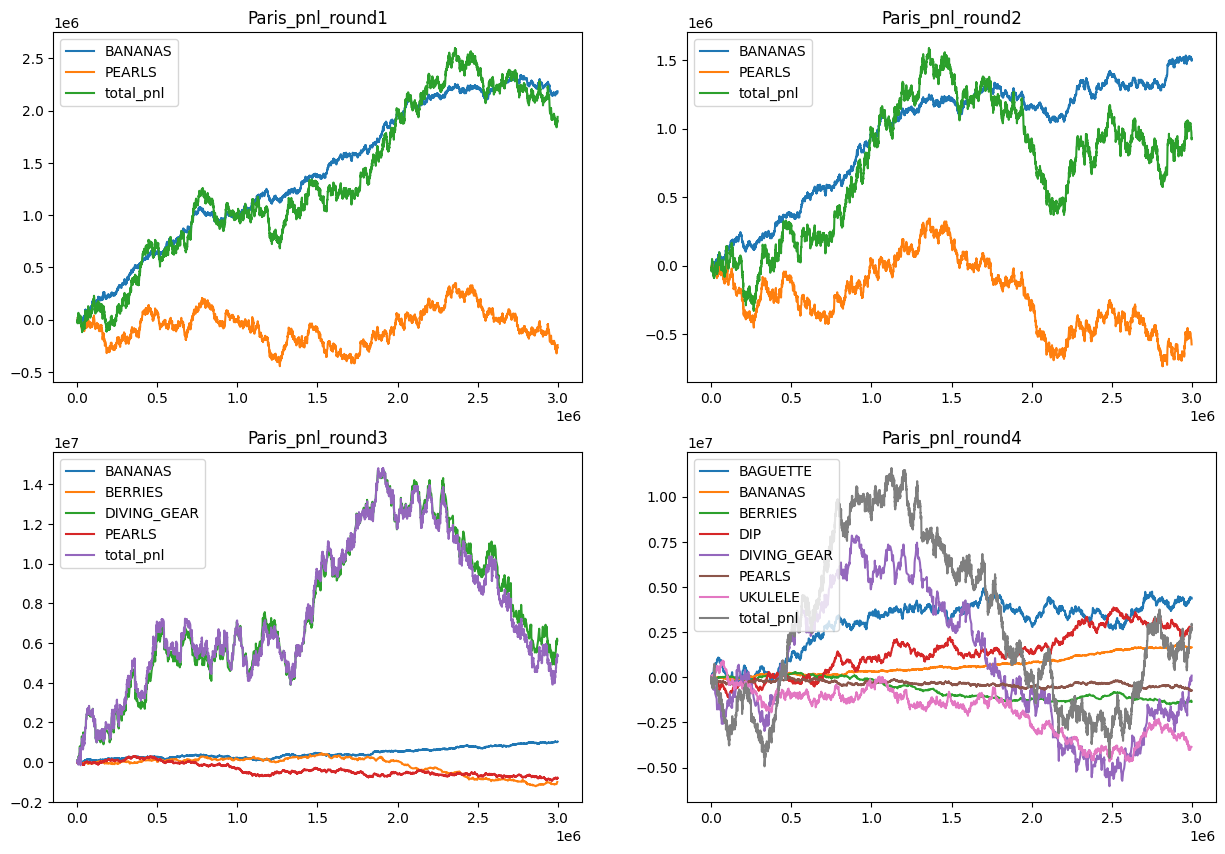

<Figure size 640x480 with 0 Axes>

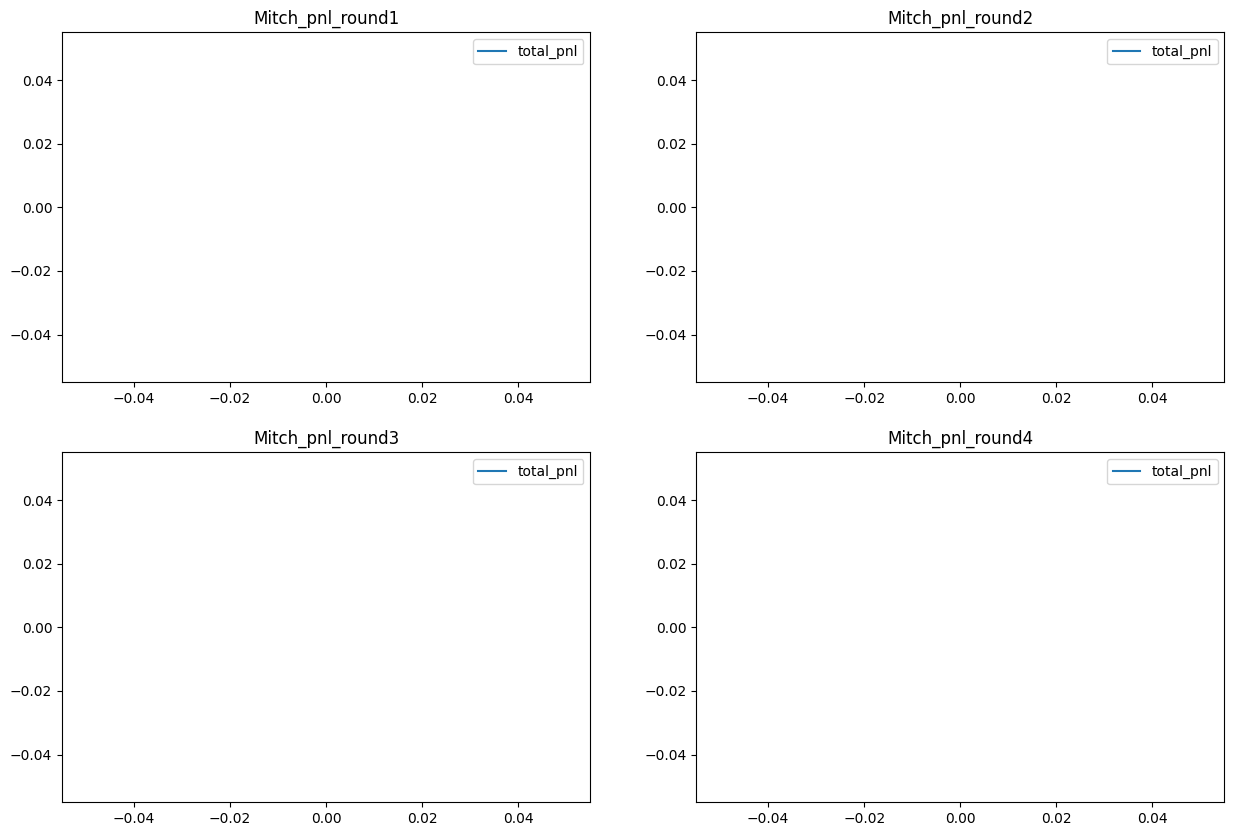

<Figure size 640x480 with 0 Axes>

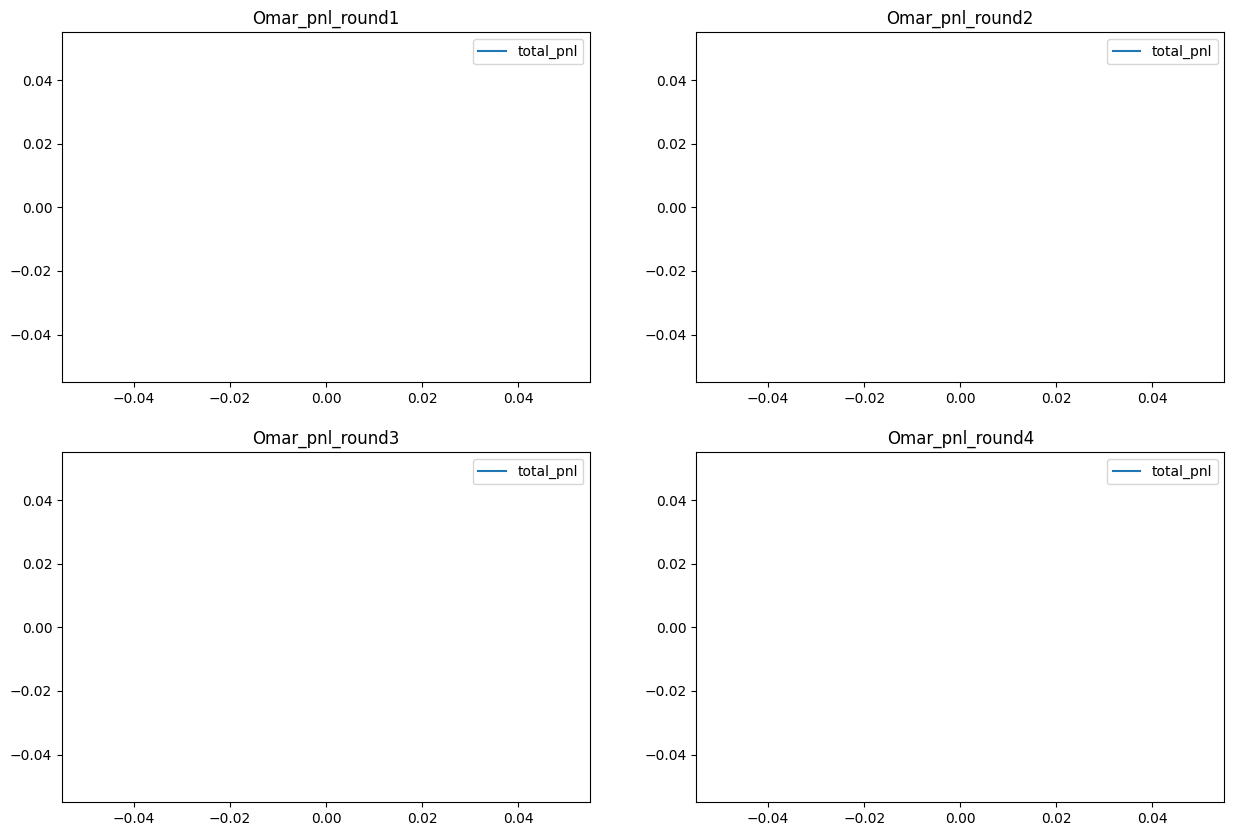

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

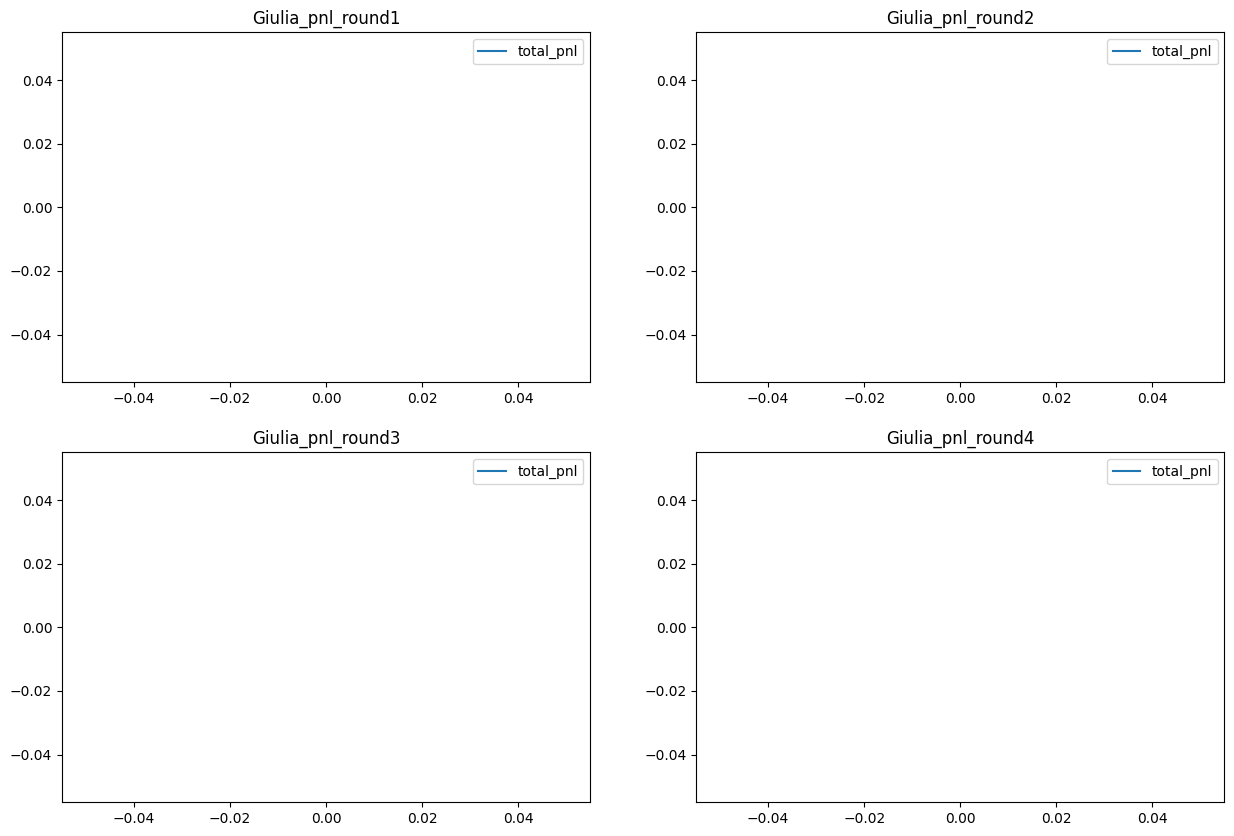

<Figure size 640x480 with 0 Axes>

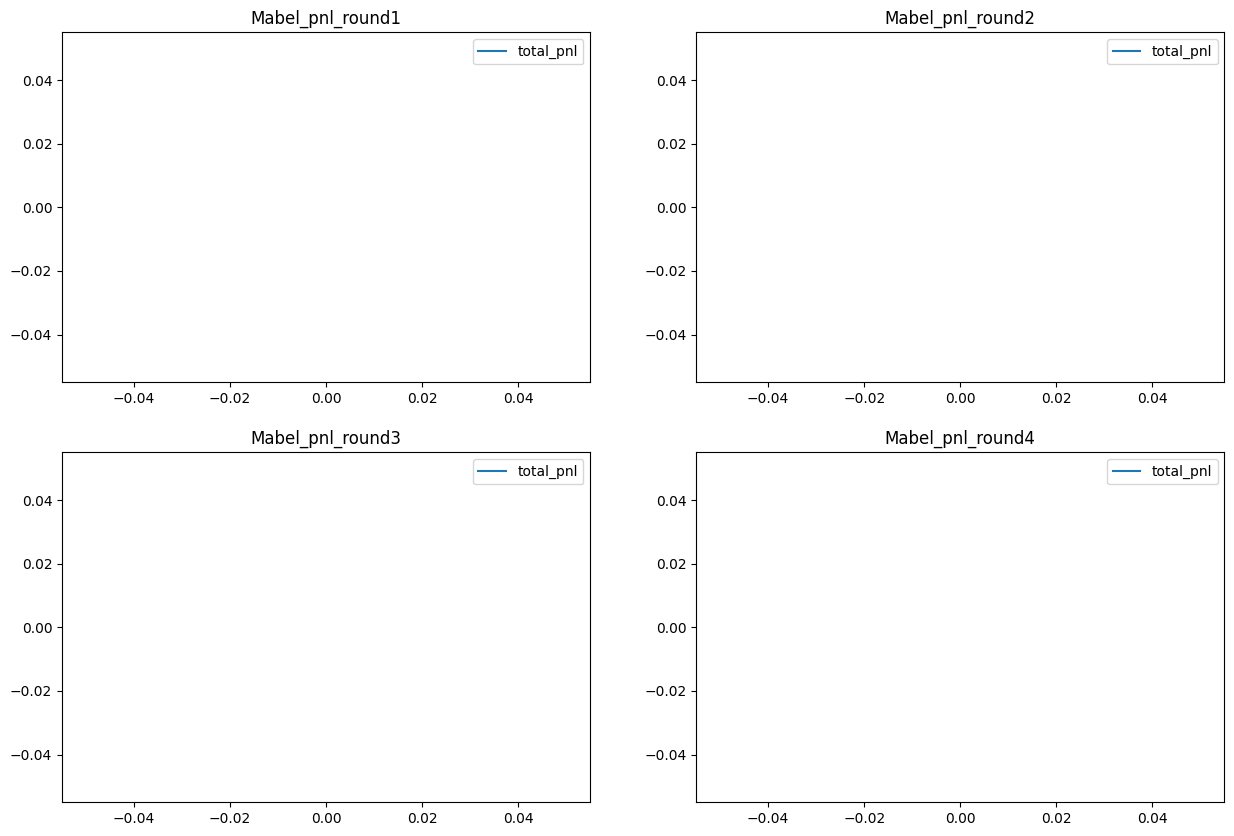

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

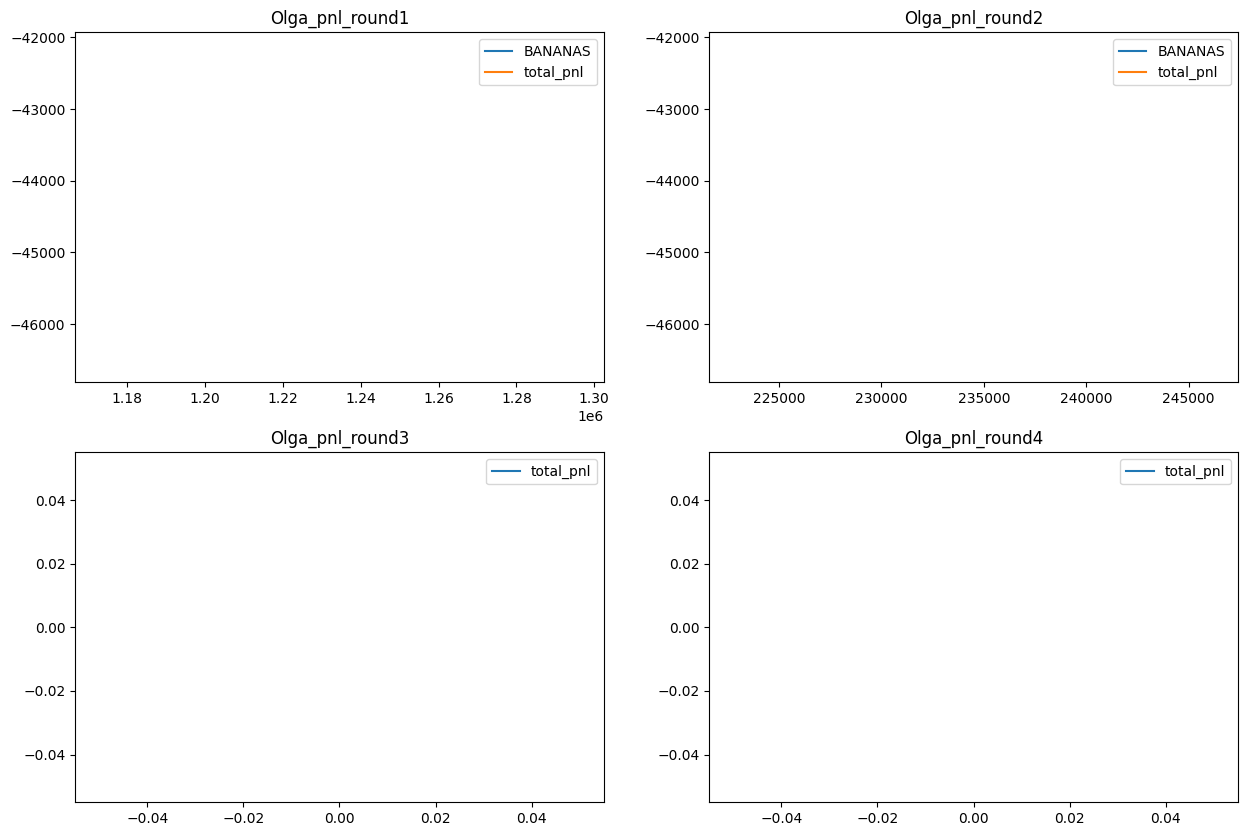

<Figure size 640x480 with 0 Axes>

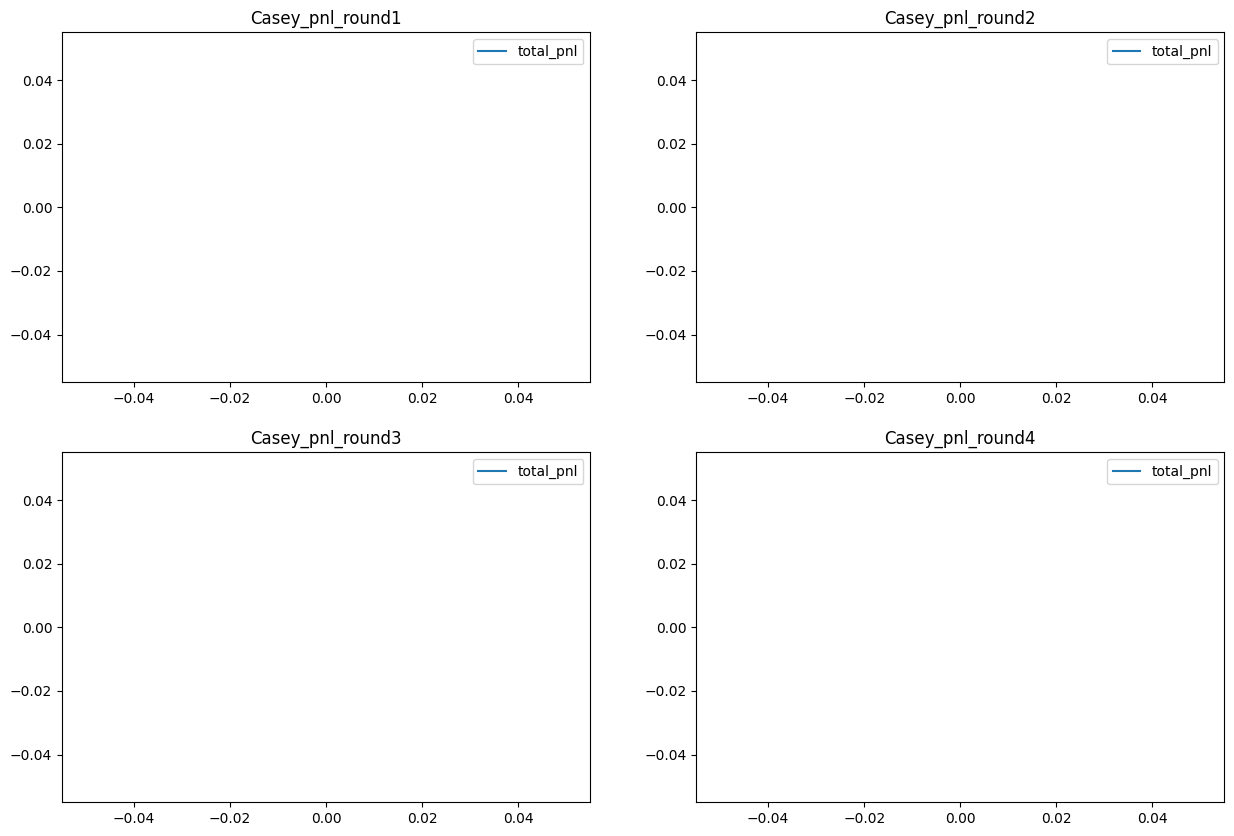

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

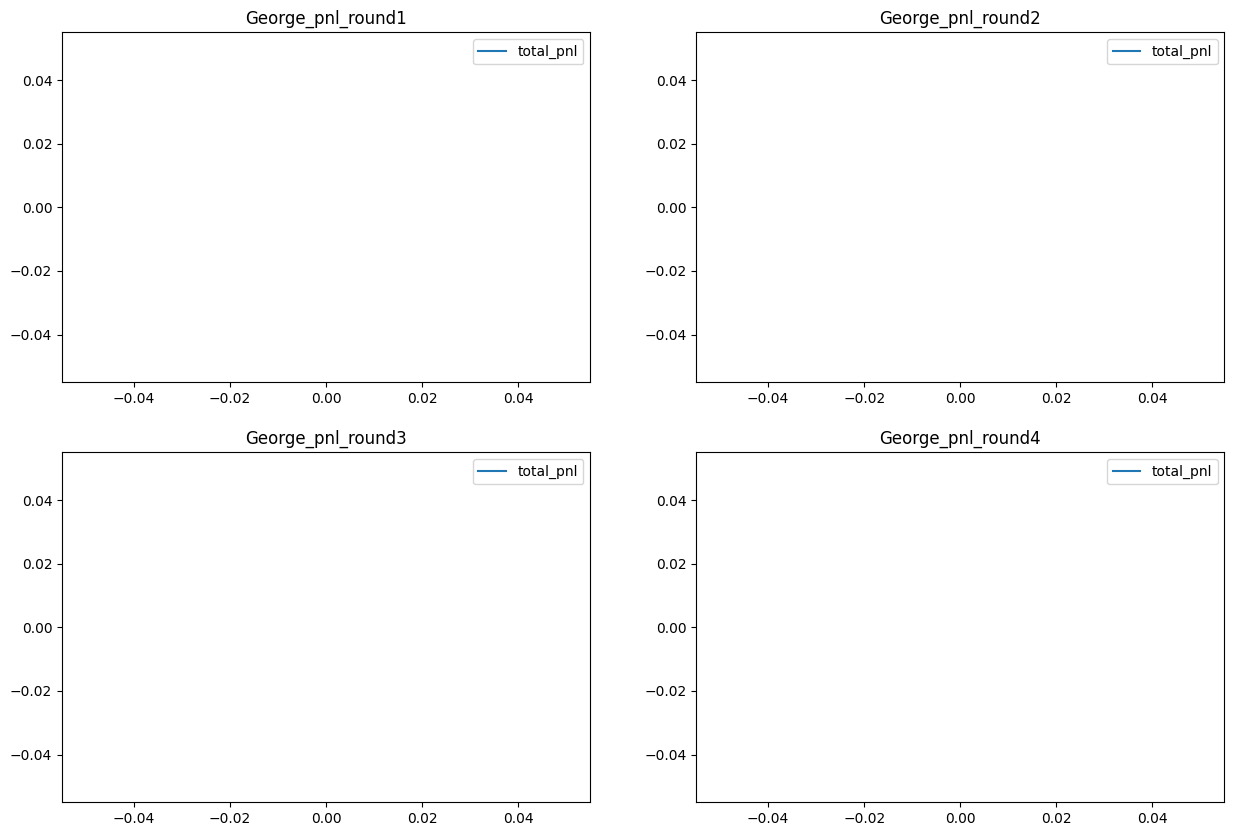

<Figure size 640x480 with 0 Axes>

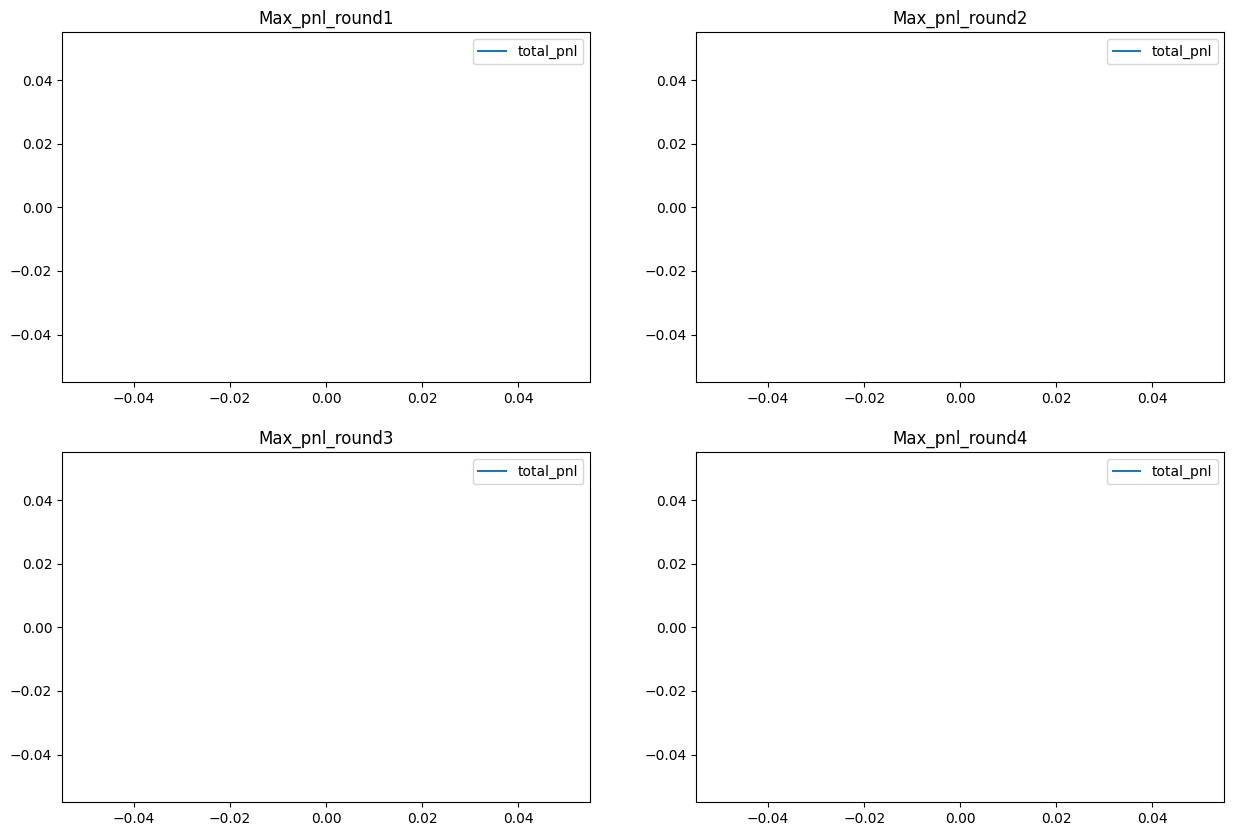

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

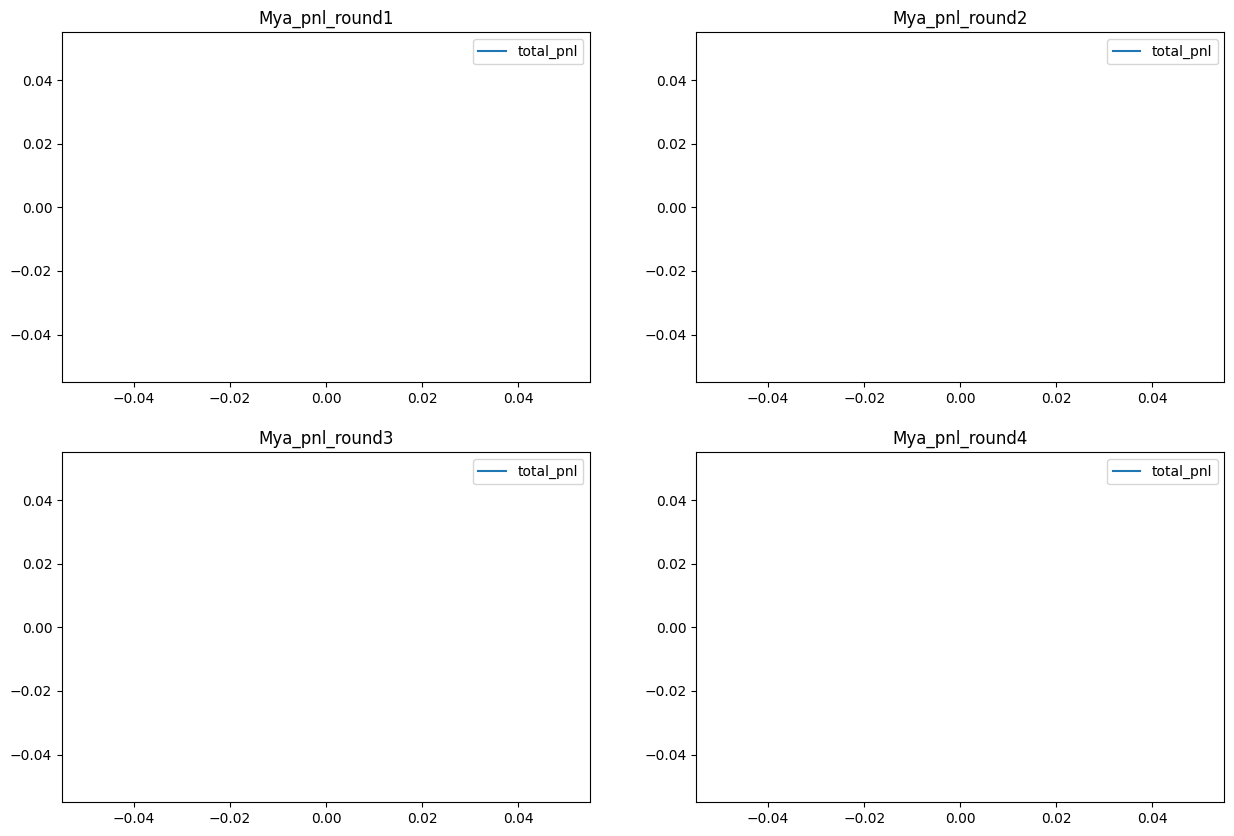

<Figure size 640x480 with 0 Axes>

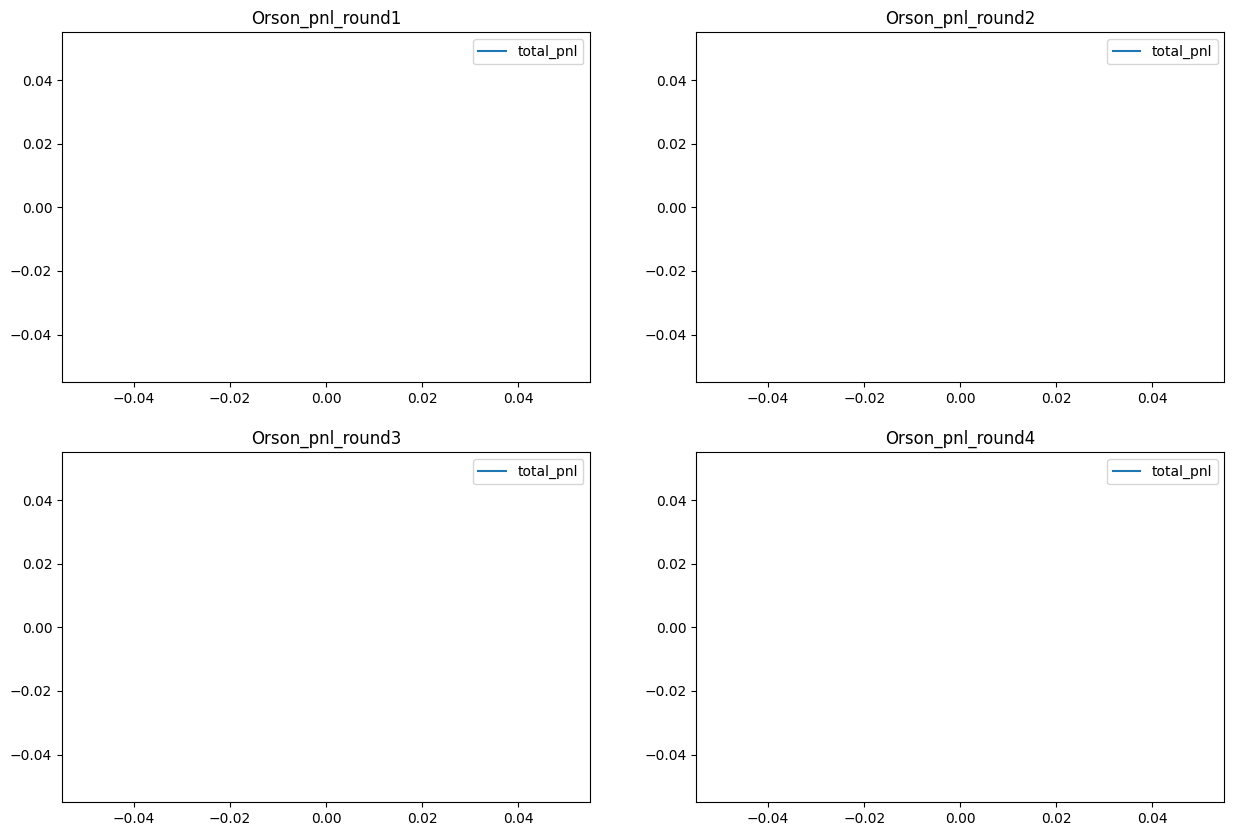

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

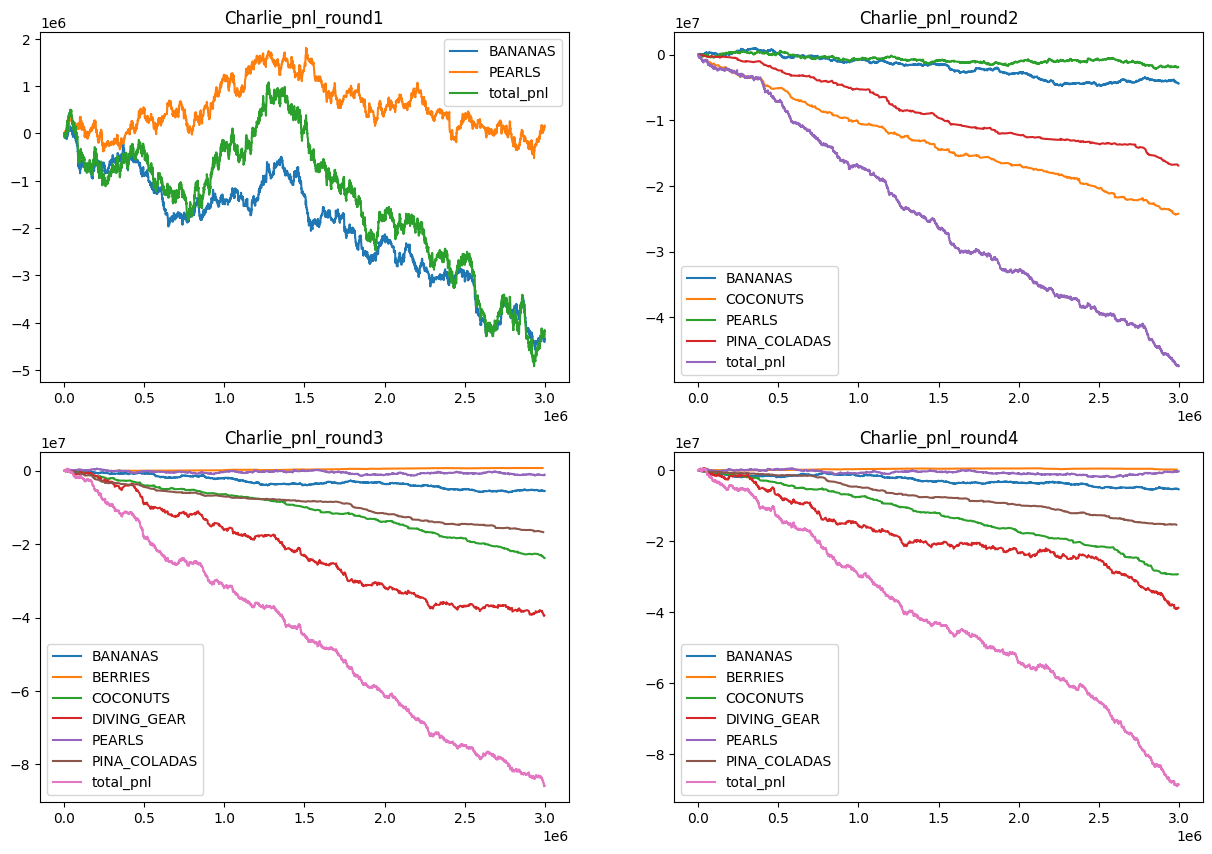

<Figure size 640x480 with 0 Axes>

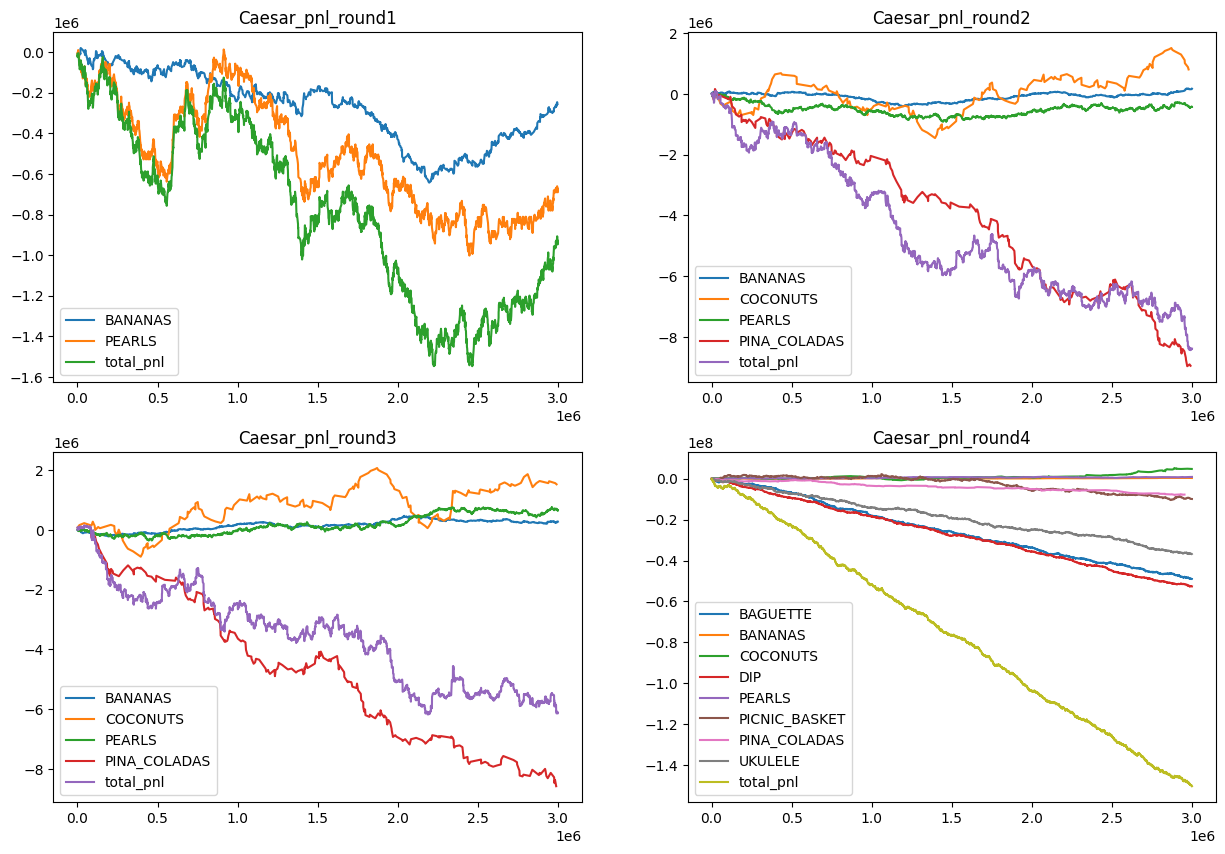

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

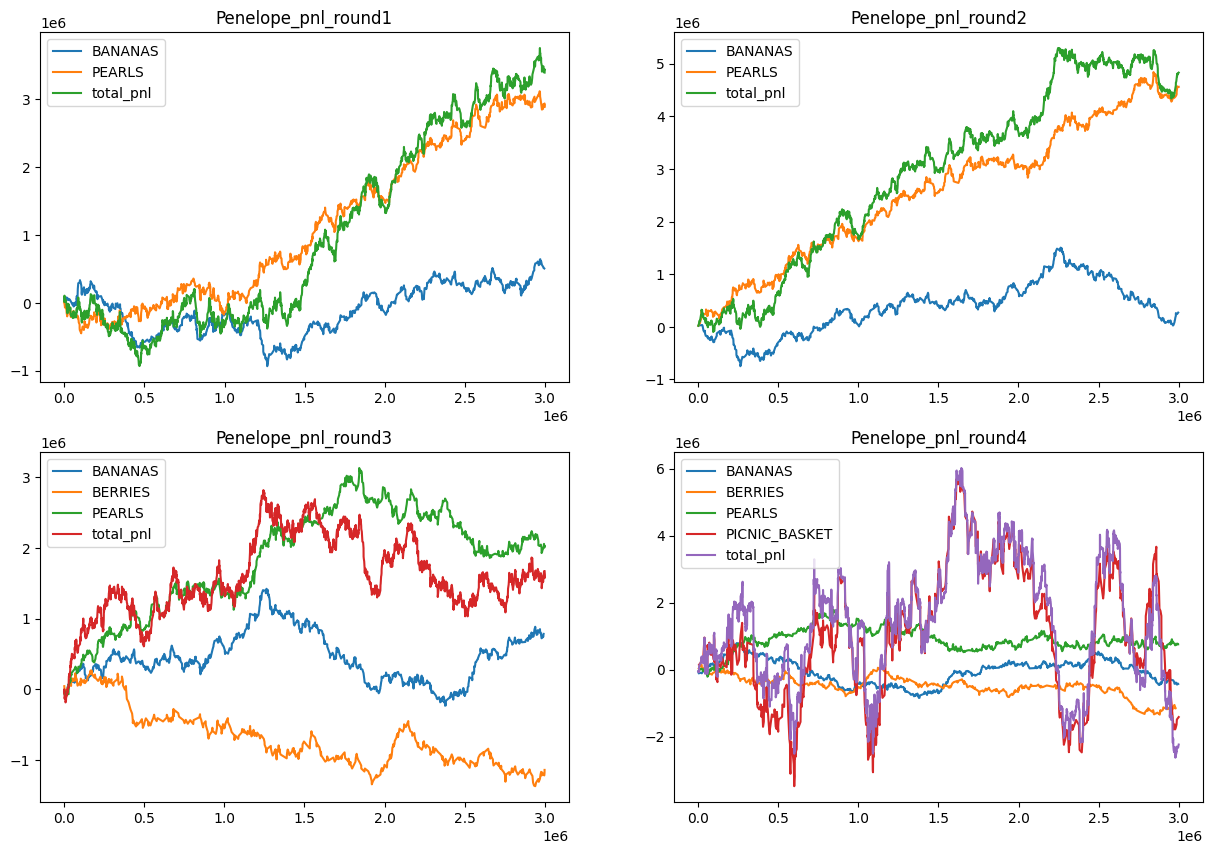

<Figure size 640x480 with 0 Axes>

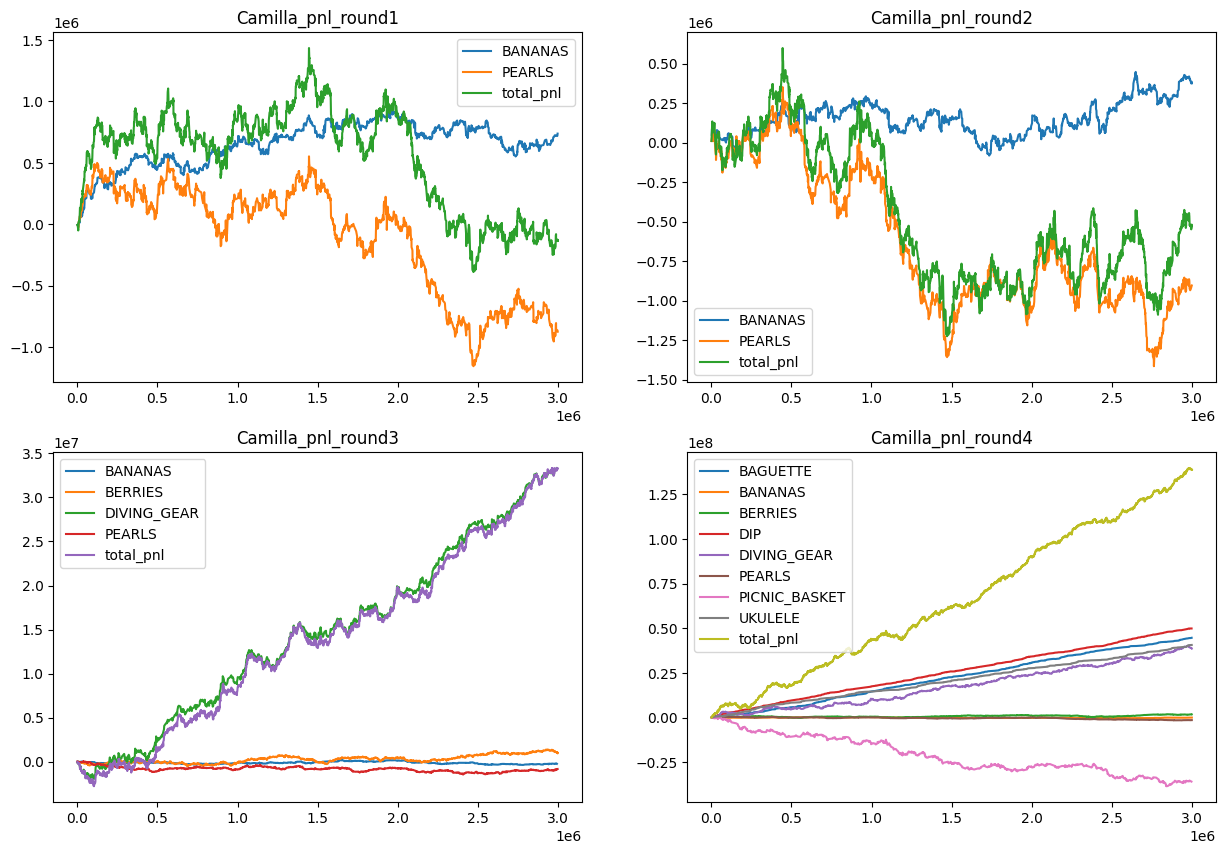

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

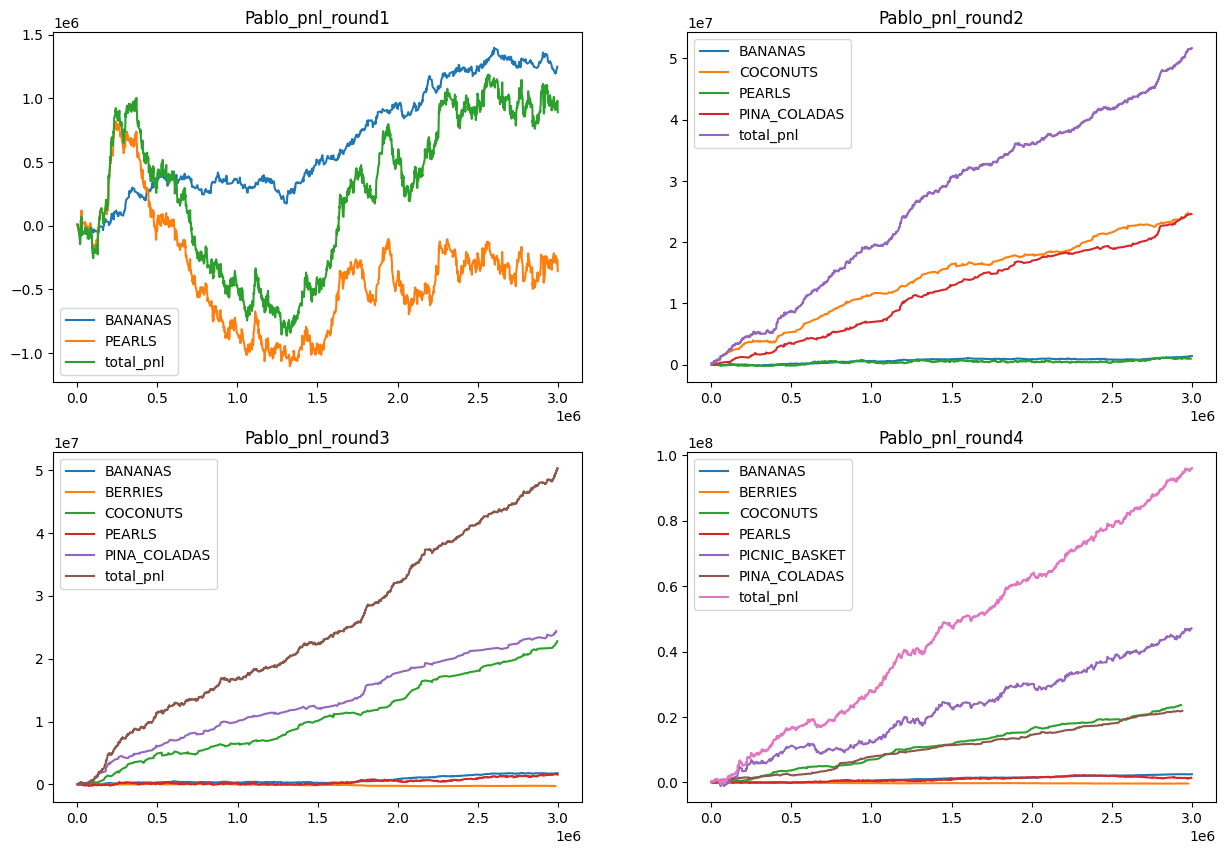

<Figure size 640x480 with 0 Axes>

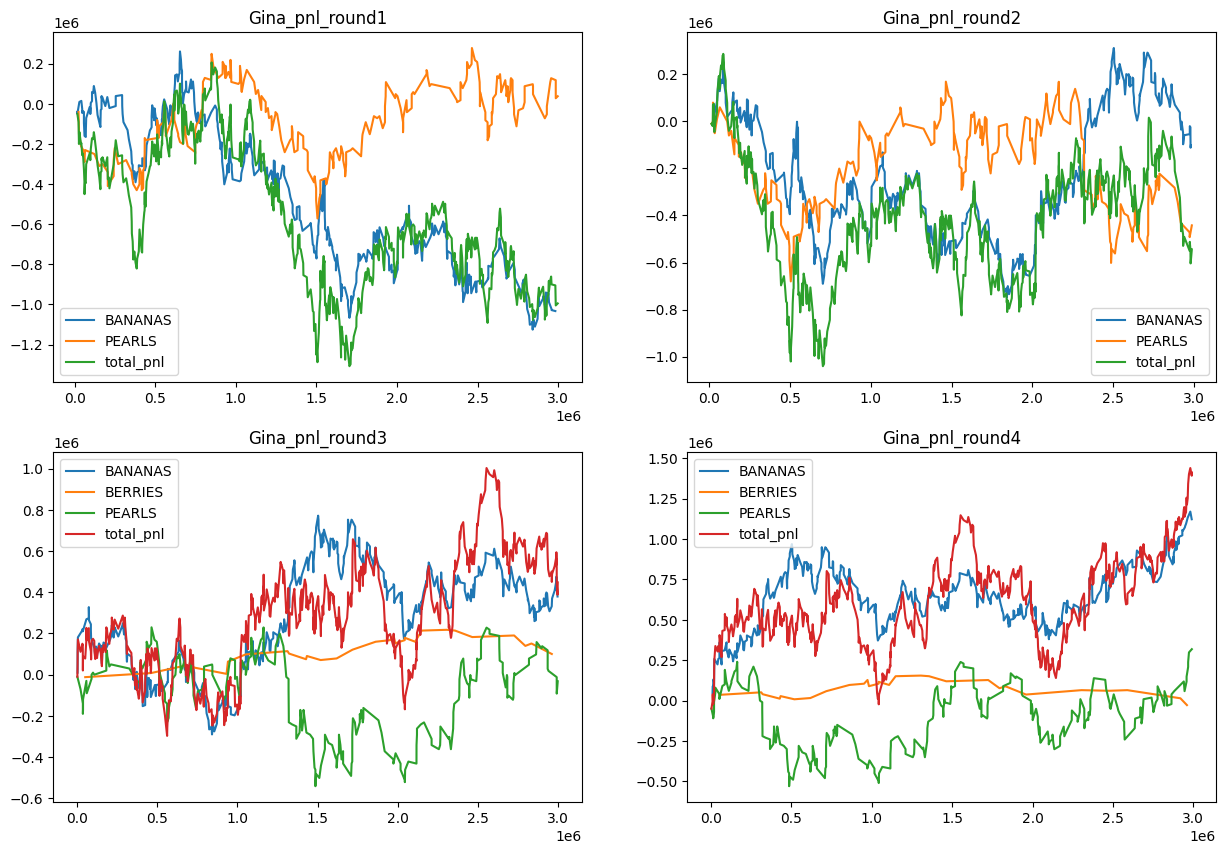

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

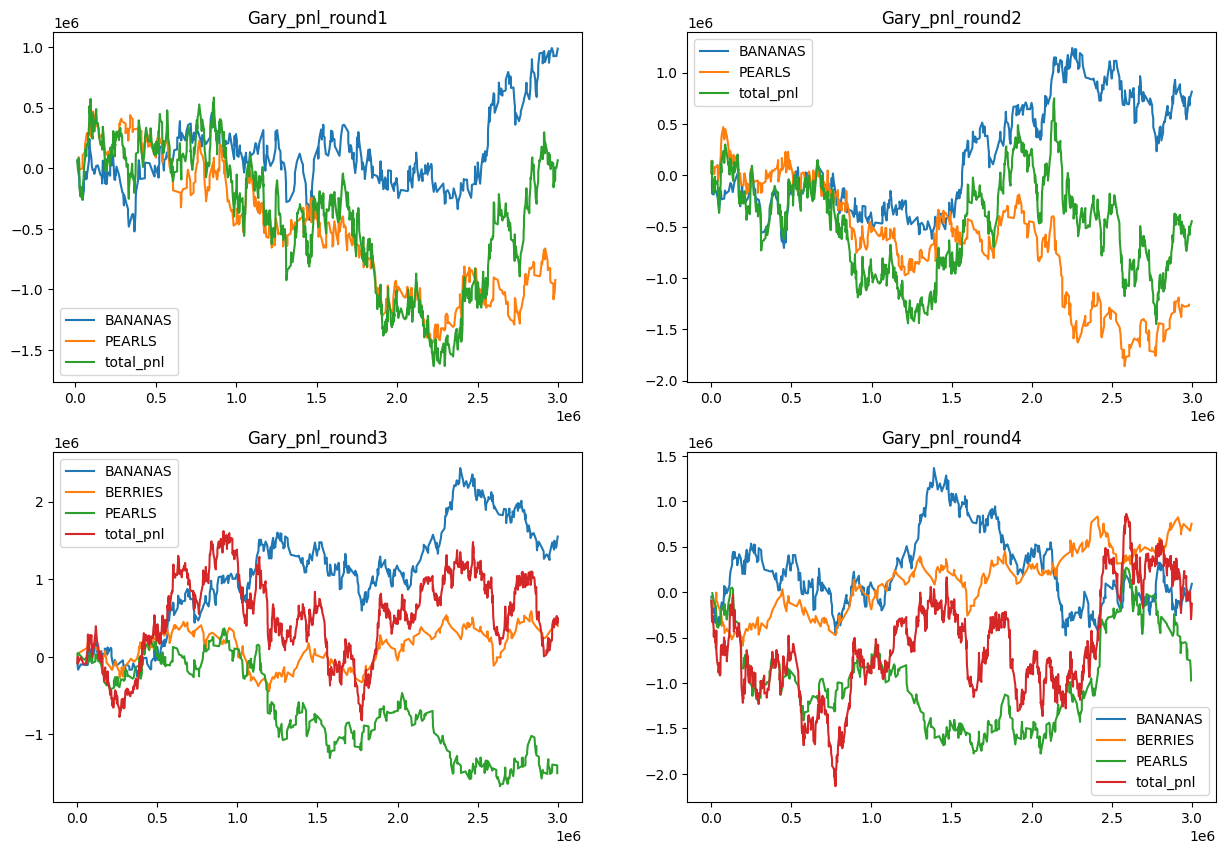

<Figure size 640x480 with 0 Axes>

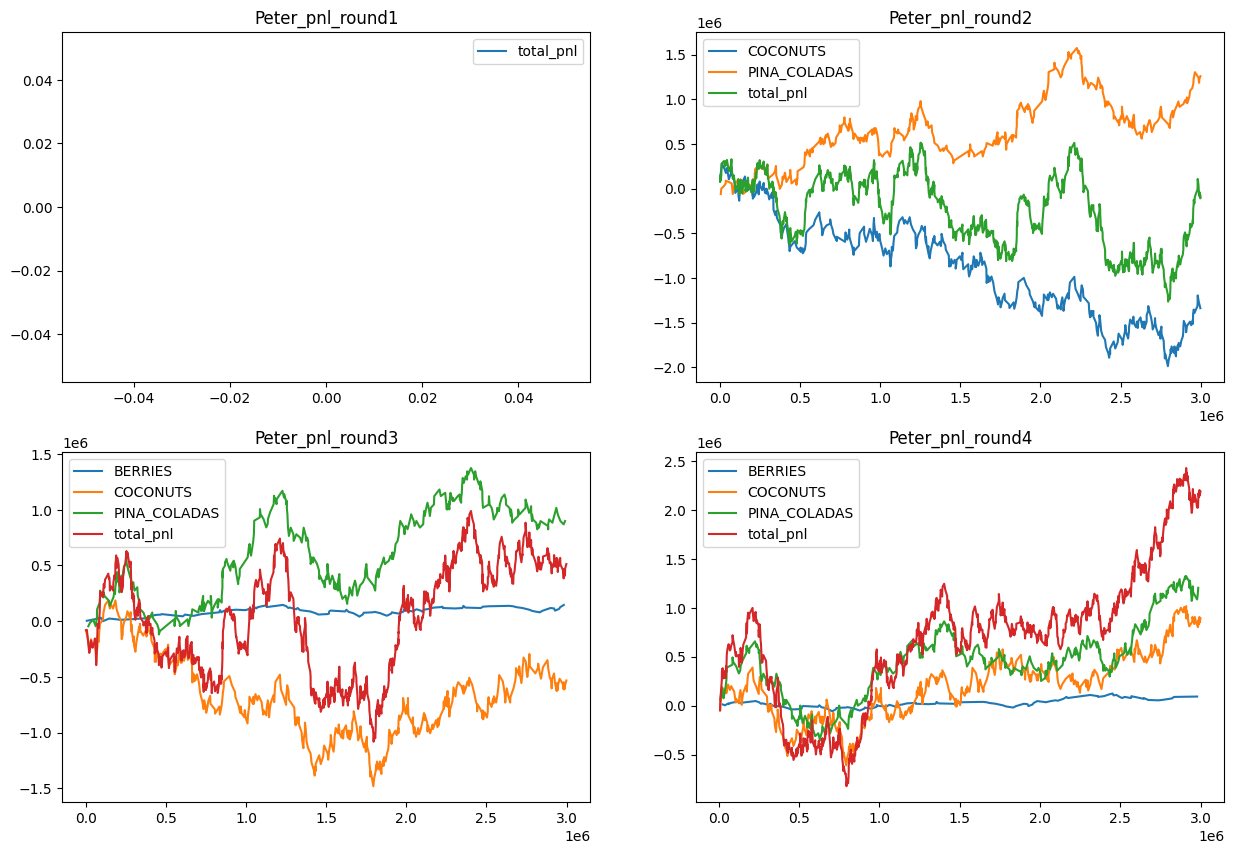

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing 'suffixes' which cause duplicate columns {'unit_x'} in the result is deprecated and will raise a MergeError in a future version.


<Figure size 640x480 with 0 Axes>

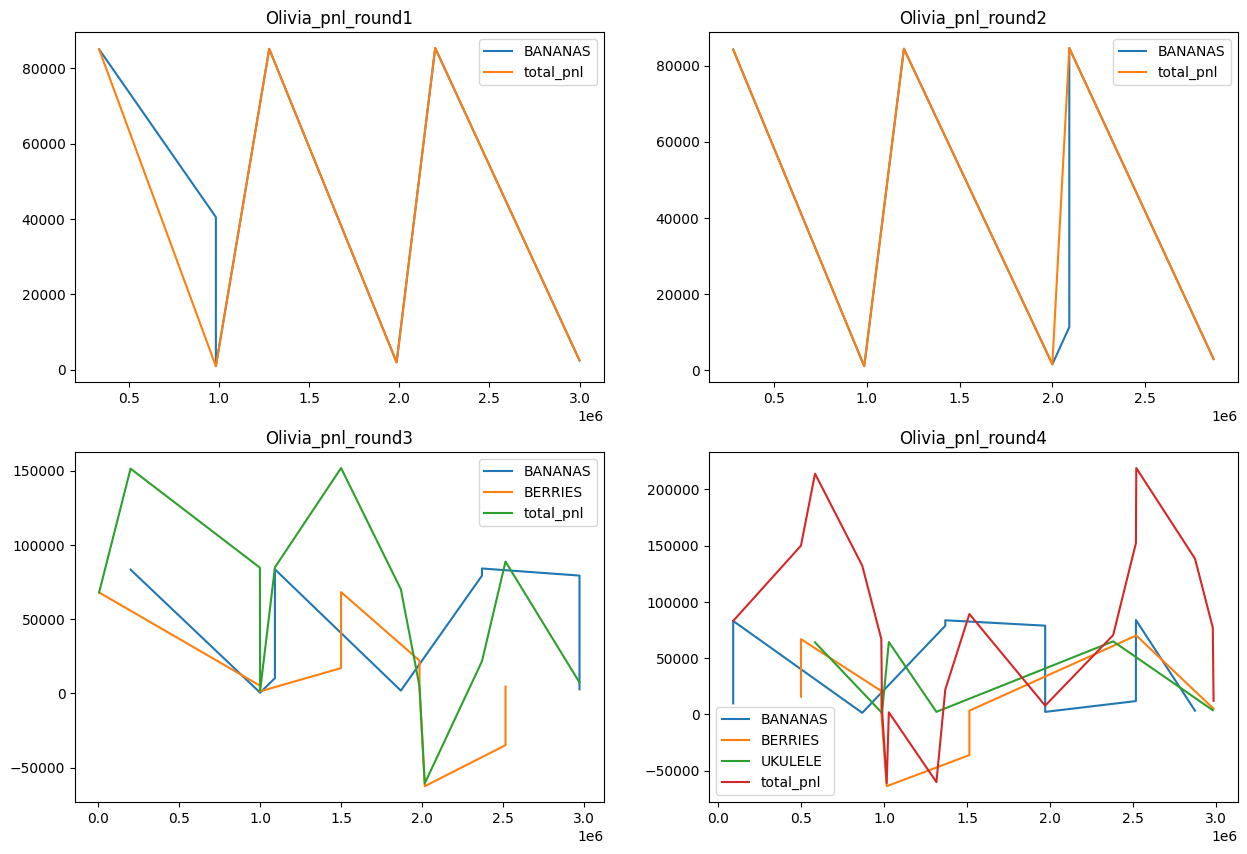

<Figure size 640x480 with 0 Axes>

In [91]:
names = ['Paris','Mitch','Omar','Giulia','Mabel','Olga','Casey','George','Max','Mya','Orson','Charlie','Caesar','Penelope','Camilla','Pablo','Gina','Gary','Peter','Olivia']
round = [d1,d2,d3,d4]#[d4]#
#trader总pnl
trader = pd.DataFrame({'timestamp':d4['timestamp'].unique()})
for n in names:
    r_c = 1
    plt.figure(figsize = (15,10))
    for r in round:
        df = pd.DataFrame(r[(r['buyer']==n) ^ (r['seller']==n)])
        time = df['timestamp'].unique()

        #买家价格为负
        df.loc[df['buyer']== n,'price'] = -1*df['price']
        df['unit'] = df['price']*df['quantity']
        temp = (df.groupby(['timestamp'])['unit'].sum()).cumsum()

        #根据asset分组
        grouped = df.groupby(['symbol'])


        ax = plt.subplot(2,2,r_c)
        ax.set_title(n+'_pnl_round'+str(r_c))

        #对各个asset进行统计
        for name,group in grouped:
            #asset的净值曲线
            group['pnl'] = group['unit'].cumsum()

            #将该asset每个timestamp的流水append到对应时间的trader_pnl表格中（unit)
            #merged = pd.merge(total_pnl, pd.DataFrame({'timestamp': group['timestamp'], 'pnl_asset': group['unit']}), on='timestamp', how='left').fillna(0)

            ax.plot(group['timestamp'],group['pnl'],label = name)


        ax.plot(df['timestamp'].unique(),(df.groupby(['timestamp'])['unit'].sum()).cumsum(),label = 'total_pnl')

        #将净值曲线加入trader总pnl表
        if r_c == 4:
            trader = pd.merge(trader,temp,on = 'timestamp',how = 'left').fillna(method = 'ffill')
        r_c += 1
        ax.legend()
    plt.show()
    plt.savefig('pnl_plot/'+n+'.png')


        
    


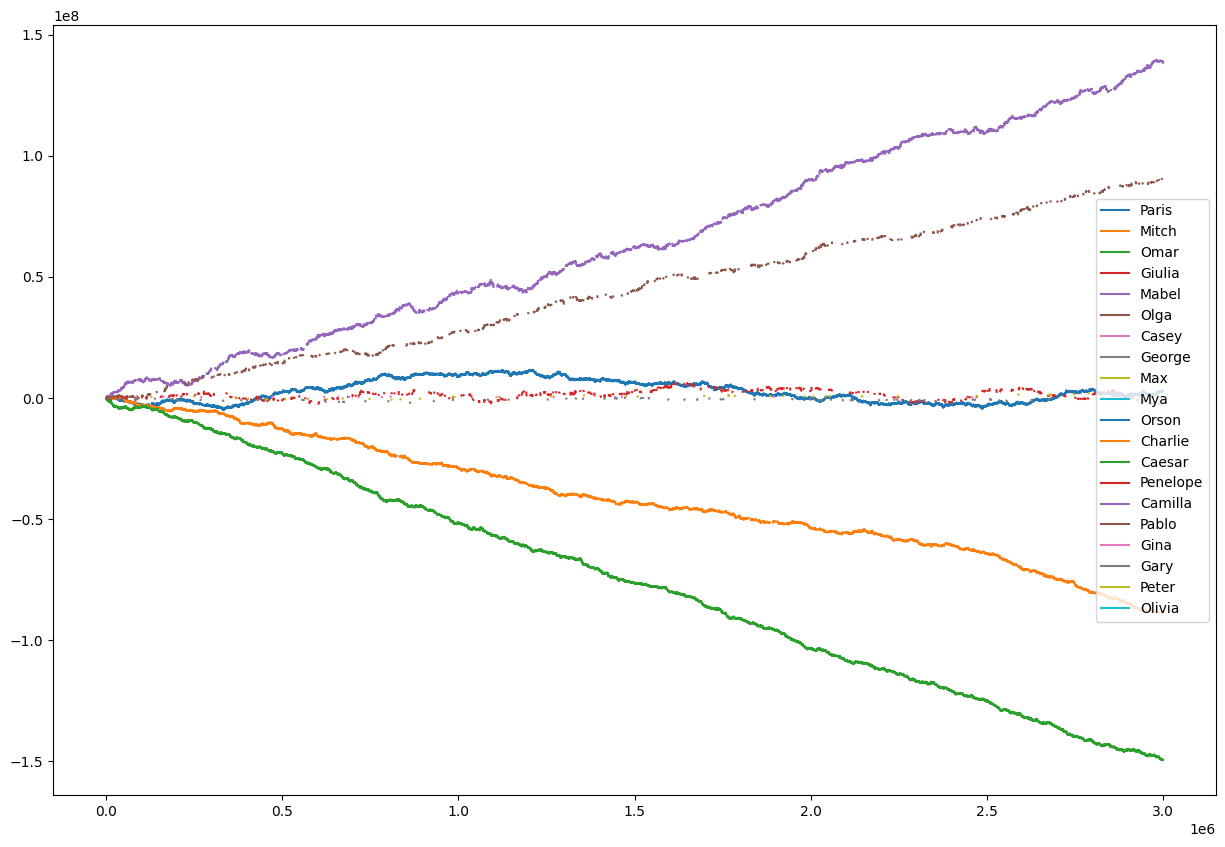

In [74]:
plt.figure(figsize = (15,10))
for i in names: 
    plt.plot(trader['timestamp'],trader[i],label = i)
plt.legend()

*************camilla: dip, baguette, ukulele  

paris(看不太出来)  

gina: banana和pearl不稳定  

*************olivia:banana和pearl稳定赚钱，可以跟她进行交易  

*****pablo(picnic to the moon,pina coladas和coconut稳定赚钱)  

peter：pina coladas和coconut稳定赚钱
